# Context

Fake news has become one of the biggest problems of our age. It has a serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to Western democracy and the stability of society.

# Content

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.


- This is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.
- Dataset contains four columns: 
    - Serial number (starting from 0)
    - Title (about the text news heading)
    - Text (about the news content)
    - Label (0 = fake and 1 = real)
- There are 78098 data entries in csv file out of which only 72134 entries are accessed as per the data frame

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = [6,6]
sns.set_theme(style="darkgrid")
%matplotlib inline

import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize

import contractions
import re
import itertools
import datetime
import time
from collections import Counter
import string
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the Dataset
df = pd.read_csv("WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
#checking shape of Dataset
df.shape

(72134, 4)

In [4]:
#checking for Null values
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
#droping the Unnamed: 0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

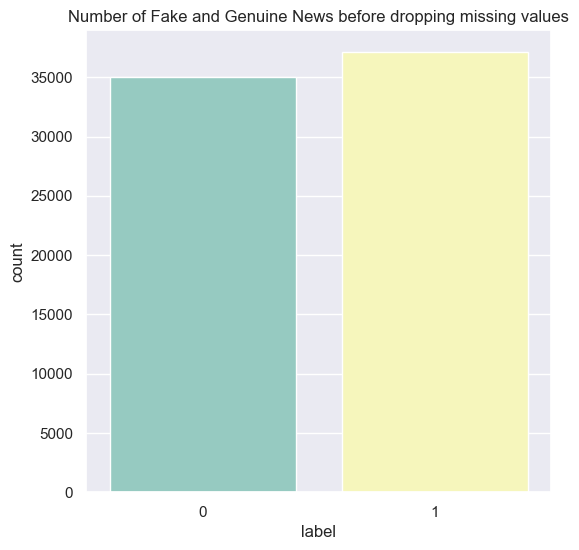

In [7]:
#ploting the count of Fake and Genuine news
sns.countplot(x='label', data=df, palette='Set3')
plt.title("Number of Fake and Genuine News before dropping missing values")
plt.show()

In [8]:
#droping Null values
df.dropna(axis=0, how='any',inplace=True)

In [9]:
#checking Null values
df.isna().sum()

title    0
text     0
label    0
dtype: int64

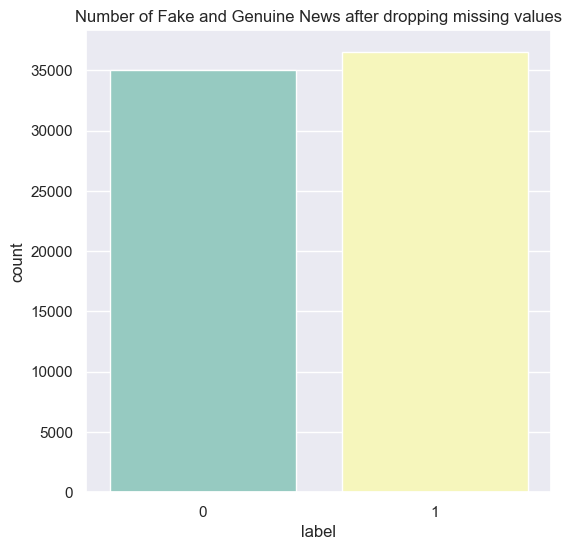

In [10]:
#ploting the count of Fake and Genuine news
sns.countplot(x='label', data=df, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()

In [11]:
#creating new column with length of text
df['raw_text_length'] = df['text'].apply(lambda x: len(x))

In [12]:
df.head()

,title,text,label,raw_text_length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530


In [13]:
df.describe()

,label,raw_text_length
count,71537.000000,71537.000000
mean,0.510351,3292.722116
std,0.499896,3738.194002
min,0.000000,1.000000
25%,0.000000,1410.000000
50%,1.000000,2440.000000
75%,1.000000,4077.000000
max,1.000000,142961.000000


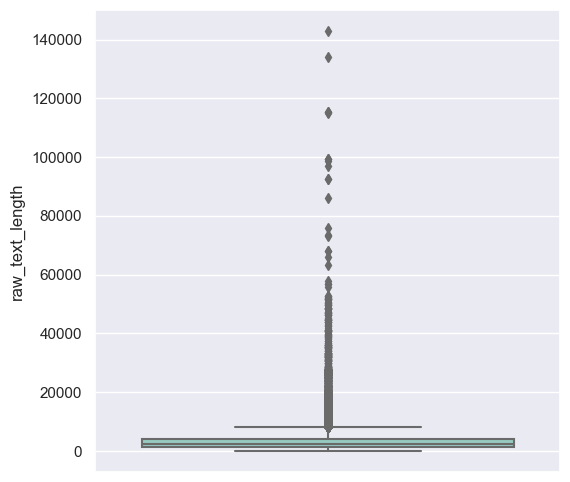

In [14]:
#checking for outliers
sns.boxplot(y='raw_text_length', data=df, palette="Set3")
plt.show()

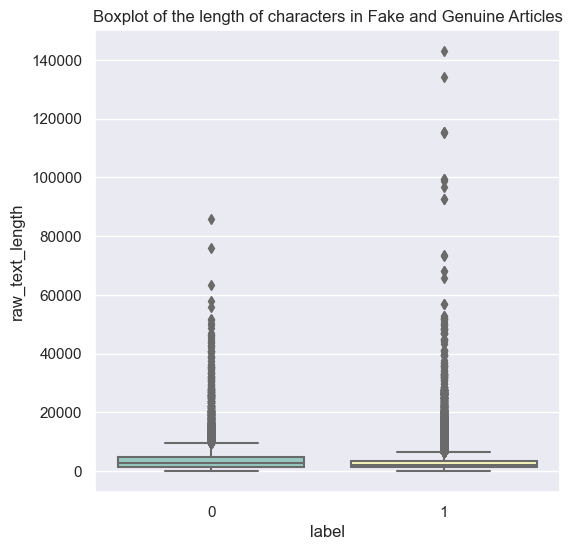

In [15]:
#checking for outliers wit respect to label
sns.boxplot(y='raw_text_length', x='label', data=df, palette="Set3")
plt.title("Boxplot of the length of characters in Fake and Genuine Articles")
plt.show()

In [16]:
# Describing the column 'raw_text_length'
df['raw_text_length'].describe()

count     71537.000000
mean       3292.722116
std        3738.194002
min           1.000000
25%        1410.000000
50%        2440.000000
75%        4077.000000
max      142961.000000
Name: raw_text_length, dtype: float64

In [17]:
# Checking the rows where value of 'raw_text_length' is 1
df[df['raw_text_length']==1]

,title,text,label,raw_text_length
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,1
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1,1
325,Ohio State University Student Says Terrorist A...,,1,1
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1,1
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1,1
...,...,...,...,...
71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1,1
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1,1
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1,1
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1,1


In [18]:
# Stripping the white spaces from column
df['text'] = df['text'].str.strip()

In [19]:
# Updating the 'raw_text_length' column using lambda function
df['raw_text_length'] = df['text'].apply(lambda x: len(x))

In [20]:
len(df[df['raw_text_length']==0])

744

In [21]:
#
df = df[(df['raw_text_length'] > 500) & (df["raw_text_length"] < 5000)]
df.shape

(52440, 4)

In [22]:
#resetting the index
df = df.reset_index(drop=True)

In [23]:
# Describing the column 'raw_text_length'
df['raw_text_length'].describe()

count    52440.000000
mean      2363.217220
std       1125.758262
min        501.000000
25%       1515.000000
50%       2260.000000
75%       3088.000000
max       4999.000000
Name: raw_text_length, dtype: float64

In [24]:
df.head()

,title,text,label,raw_text_length
0,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916
1,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530
2,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,1439
3,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,3007
4,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,4679


In [25]:
df.describe(include='all')

,title,text,label,raw_text_length
count,52440,52440,52440.000000,52440.000000
unique,45918,46232,NaN,NaN
top,Highlights: The Trump presidency on April 13 a...,Leave a Reply Click here to get more info on f...,NaN,NaN
freq,8,38,NaN,NaN
mean,NaN,NaN,0.532971,2363.217220
std,NaN,NaN,0.498916,1125.758262
min,NaN,NaN,0.000000,501.000000
25%,NaN,NaN,0.000000,1515.000000
50%,NaN,NaN,1.000000,2260.000000
75%,NaN,NaN,1.000000,3088.000000


## Text Cleaning Using NLP

1. Remove special characters
2. Expand contractions
3. Convert to lower-case
4. Word Tokenize
5. Remove Stopwords

In [26]:
# Remove special characters using Regular Expression
# Expand contractions can be done using this step
# Converting each word to lower-case

def preprocess_text(x):
    cleaned_text = re.sub(r'[^a-zA-Z\d\s\']+', '', x)
    word_list = []
    for each_word in cleaned_text.split(' '):
        try:
            word_list.append(contractions.fix(each_word).lower())
        except:
            print(x)
    return " ".join(word_list)

In [27]:
text_cols = ['title' , 'text']

In [28]:
for col in text_cols:
    print("Processing column: {}".format(col))
    df[col] = df[col].apply(lambda x: preprocess_text(x))

Processing column: title
Processing column: text


In [29]:
# Word Tokenization
for col in text_cols:
    print("Processing column: {}".format(col))
    df[col] = df[col].apply(word_tokenize)

Processing column: title
Processing column: text


In [30]:
# Removing Stopwords
for col in text_cols:
    print("Processing column: {}".format(col))
    df[col] = df[col].apply(
        lambda x: [each_word for each_word in x if each_word not in stopwords])

Processing column: title
Processing column: text


In [31]:
df.head()

,title,text,label,raw_text_length
0,"[satan, 2, russia, unvelis, image, terrifying,...","[rs28, sarmat, missile, dubbed, satan, 2, repl...",1,1916
1,"[time, christian, group, sues, amazon, splc, d...","[say, one, time, someone, sued, southern, pove...",1,1530
2,"[sports, bar, owner, bans, nfl, gameswill, sho...","[owner, ringling, bar, located, south, white, ...",1,1439
3,"[latest, pipeline, leak, underscores, dangers,...","[file, sept, 15, 2005, file, photo, marker, we...",1,3007
4,"[gop, senator, smacked, punchable, altright, n...","[punchable, altright, nazi, internet, got, tho...",1,4679


In [32]:
# since count vectorizer expects strings
df['text_joined'] = df['text'].apply(lambda x: " ".join(x))

In [33]:
df.head()

,title,text,label,raw_text_length,text_joined
0,"[satan, 2, russia, unvelis, image, terrifying,...","[rs28, sarmat, missile, dubbed, satan, 2, repl...",1,1916,rs28 sarmat missile dubbed satan 2 replace ss1...
1,"[time, christian, group, sues, amazon, splc, d...","[say, one, time, someone, sued, southern, pove...",1,1530,say one time someone sued southern poverty law...
2,"[sports, bar, owner, bans, nfl, gameswill, sho...","[owner, ringling, bar, located, south, white, ...",1,1439,owner ringling bar located south white sulphur...
3,"[latest, pipeline, leak, underscores, dangers,...","[file, sept, 15, 2005, file, photo, marker, we...",1,3007,file sept 15 2005 file photo marker welcomes c...
4,"[gop, senator, smacked, punchable, altright, n...","[punchable, altright, nazi, internet, got, tho...",1,4679,punchable altright nazi internet got thorough ...


In [34]:
# iterate through the csv file
all_texts_gen = " ".join(df[df['label']==1]['text_joined'])
all_texts_fake = " ".join(df[df['label']==0]['text_joined'])

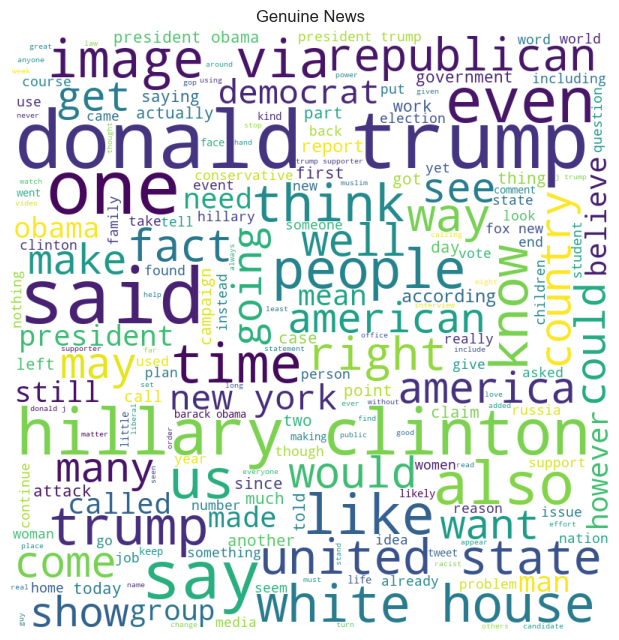

In [35]:
# Plotting wordcloud for Genuine news

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_texts_gen)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genuine News")
plt.show()

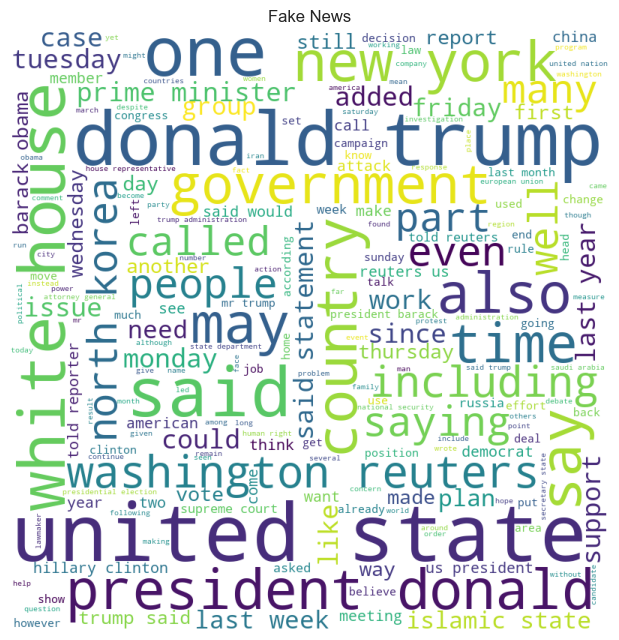

In [36]:
# Plotting wordcloud for fake news

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_texts_fake)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Fake News")
plt.show()

In [37]:
count_vectorizer = CountVectorizer(max_features=200,ngram_range=(1, 2))
tf_idf_transformer = TfidfTransformer(smooth_idf=False)

# fit train data to count vectorizer
count_vectorizer.fit(df['text_joined'].values)
count_vect_train = count_vectorizer.transform(df['text_joined'].values)

# fit ngrams count to tfidf transformers
tf_idf_transformer.fit(count_vect_train)
tf_idf_train = tf_idf_transformer.transform(count_vect_train)

# Train Test Split
Now data is clean and numarical, we want to seprate features from targets, and split in between traning and test sets

In [38]:
target = df["label"].values
X_train, X_test, y_train, y_test = train_test_split(tf_idf_train, target , random_state=0)

In [39]:
# Creating dataframe for model evaluation

df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score', 'Training Time (secs)'
])
models_trained_list = []

# model building

def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    # time keeping
    start_time = time.time()
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    elapsed_time = time.time() - start_time
    # Time Elapsed
    print("Time elapsed: {:.2f} s.".format(elapsed_time))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        "{:.2f}".format(elapsed_time)
    ]
    # keep a track of trained models
    models_trained_list.append(model)
    print("Completed {} model's performance assessment.".format(model_name))

In [40]:
# Creating list of all models

models_list = [LogisticRegression(),
               MultinomialNB(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               AdaBoostClassifier()]

In [41]:
# Training the models

for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 0.47 s.
Completed LogisticRegression model's performance assessment.
Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.02 s.
Completed MultinomialNB model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 119.59 s.
Completed RandomForestClassifier model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 12.83 s.
Completed DecisionTreeClassifier model's performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 119.88 s.
Completed GradientBoostingClassifier model's performance assessment.
Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 24.39 s.
Completed AdaBoostClassifier mod

In [42]:
# Evaluation of all Models
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs)
0,LogisticRegression,0.910831,0.910679,0.907757,0.927063,0.917308,0.47
1,MultinomialNB,0.847063,0.847368,0.851623,0.865116,0.858316,0.02
2,RandomForestClassifier,0.999975,0.936918,0.915535,0.971596,0.942732,119.59
3,DecisionTreeClassifier,0.999975,0.908772,0.906977,0.924065,0.915441,12.83
4,GradientBoostingClassifier,0.923544,0.923112,0.905051,0.956466,0.930049,119.88
5,AdaBoostClassifier,0.916527,0.918993,0.911748,0.939338,0.925337,24.39


## Hyperparameter Tuning

In [43]:
# Create a search grid of parameters that will be shuffled through

param_grid = {'bootstrap': [True],
              'max_depth': [10, 50, 100, None],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 5],
              'n_estimators': [200, 400, 500, 800, 1000]}

# Using the random grid and searching for best hyperparameters

rf = RandomForestClassifier()  # creating base model

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,
                               cv=3, verbose=2, n_jobs=-1)

In [44]:
# Fit the grid search to the data

# grid_search.fit(X_train, y_train)

# grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [45]:
# building model using best parameters

RF = RandomForestClassifier(bootstrap = True,
                            max_depth = 100,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 500)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=500)

In [46]:
# Evaluating the model after hyperparameter tuning

y_pred = RF.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.9367658276125095
Precision:  0.9125150260451449
Recall:  0.9751641450185555
f1-score:  0.9427999724004692


# Prediction

In [47]:
# Predicton

def output_lable(n):
    if n == 0:
        return "This is a Fake News"
    elif n == 1:
        return "This is a Genuine news"

def manual_testing(news):
    #preprocessing data
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(preprocess_text)
    new_x_test = new_def_test["text"]
    new_xv_test = count_vectorizer.fit_transform(new_x_test)
    new_xvw_test = tf_idf_transformer.fit_transform(new_xv_test)
    pred_RF = RF.predict(new_xvw_test)

    return print("\n\n RF Prediction: ",output_lable(pred_RF[0]))

In [49]:
news = str(input())
manual_testing(news)

US COVID-19 Cases Rise Again, But Experts Do Not Expect a Surge  The number of COVID-19 cases in the United States has been rising in recent weeks, but experts do not expect a major surge.  The Centers for Disease Control and Prevention (CDC) reported on Wednesday that the seven-day average of new cases was 100,000 per day, up from 70,000 per day a month ago. However, the CDC said that the number of hospitalizations and deaths is still relatively low.  The rise in cases is being driven by the BA.5 subvariant of Omicron, which is more transmissible than previous variants. However, experts say that the BA.5 subvariant is not as severe as previous variants, and that most people who are vaccinated and boosted will not get seriously ill.  The CDC is still recommending that people wear masks in indoor public settings, especially if they are in areas with high transmission rates. The CDC is also urging people to get vaccinated and boosted.  The rise in cases is a reminder that the pandemic is

In [50]:
news = str(input())
manual_testing(news)

A new COVID-19 variant has been detected in California, health officials said on Monday. The variant, which has been dubbed "XBB," is a subvariant of Omicron and is believed to be more transmissible than previous variants.  The variant was first detected in a sample taken from a patient in Los Angeles County on July 15. Since then, it has been detected in samples from several other counties in California.  Health officials say that the XBB variant is still under investigation and that it is not yet clear how severe it is or how it will impact the pandemic. However, they are urging people to get vaccinated and boosted to protect themselves from the virus.  The XBB variant is the latest in a series of new COVID-19 variants that have emerged in recent months. The Omicron variant, which was first detected in South Africa in November 2021, quickly became the dominant variant in the United States. However, it has since been replaced by the BA.2 subvariant, which is believed to be more transm

In [ ]:
# save the model to disk

pickle.dump(RF,open('Fake_News_Detection_using_NLP.pkl','wb'))